Consider the effect of reaction on conversion in a PFR whose volume is
1.5 dm$^3$. The irreversible liquid phase reaction $A\rightarrow B$ is taking place in
which the feed concentration is $C_A0$ = 1.0 mol/dm$^3$ and the volumetric
flow rate is $q_0$ = 0.9 dm$^3$/min. The reaction rate constant for various 
reaction orders are fixed at 1.1 for this comparison with units that are 
consistent with the aforementioned concentration and flow rate. 

1. Plot the conversion in a PFR as a function of reactor volume for zero-, first, second-, and third-order reaction to a reactor volume of 1.5 dm$^3$.
2. Repeat (A) for feed concentrations of $C_{A0}$ at 0.5 and 3.0 mol/dm$^3$.

Author:
   Ali Gabriel Lara\
   Marzo 2014

 Revision : None\
  Taken from Cutlip, 1998

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
def ode_pfr(v, x, p):
    cao, qo, k, n = p
    
    ca = cao * (1 - x)
    ra = - k * ca**n
    dx_dv = - ra/(qo * cao)
    return dx_dv

In [4]:
k = 1.1          # kinetic constant
q0 = 0.9         # caudal de entrada, dm3/min
Vreactor = 1.5   # Reactor volume, dm3
Cao = 1          # Initial concentration of A mol/dm3

VSpan = np.linspace(0, Vreactor, 50) 

In [5]:
orders = np.arange(0, 4)
conv = []
for n in orders:
    parameters = [Cao, q0, k, n]
    fun = lambda x, v: ode_pfr(x, v, parameters)
    solution = solve_ivp(fun, (0, Vreactor), [0], t_eval=VSpan)
    X = solution.y[0]
    X[X>=1] = 1
    conv.append(X)

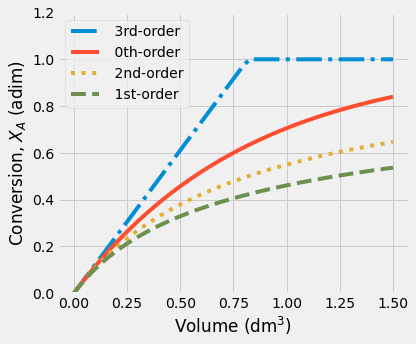

In [6]:
labels = {' 0th-order', ' 1st-order', ' 2nd-order', ' 3rd-order'}
lss = {'--', ':', '-.', '-'}

fig, ax = plt.subplots(figsize=(6,5))
for i, (label, ls) in enumerate(zip(labels, lss)):
    ax.plot(VSpan, conv[i], ls=ls, label=label)
ax.legend()

ax.set_xlabel('Volume (dm$^3$)')
ax.set_ylabel('Conversion, $X_A$ (adim)')
ax.set_ylim([0,1.2])

plt.tight_layout()
plt.show()